题目一、以鸢尾花数据集为例学习 SVM

1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

2.创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）

3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
#1.
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

#3.
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\\n", conf_matrix)

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:\n [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


题目二、以新闻数据分类为例 学习朴素贝叶斯

1.导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups

2.查看类别标签、数据集的描述、数据样本

3.将文本数据转换为词袋模型

4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42

5.创建并训练朴素贝叶斯分类器

6.使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果

7.横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a 
数据样本: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind o

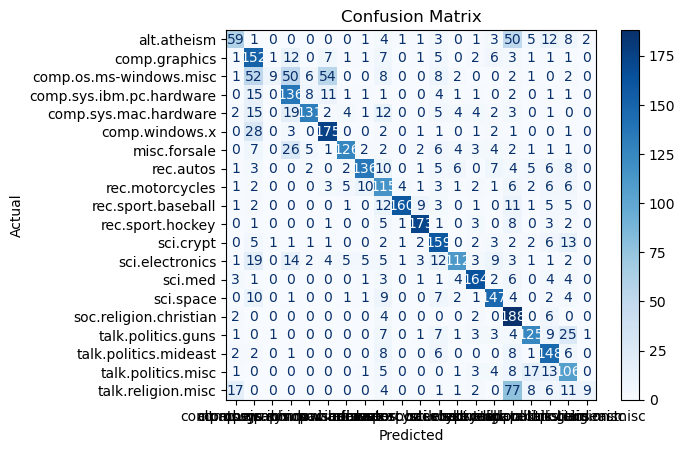

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#1.2.
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))  # 可移除头尾信息提高训练速度
print("类别标签:", data.target_names)
print("数据集描述:", data.DESCR[:500])  # 显示描述部分信息
print("数据样本:", data.data[0])  # 显示第一个数据样本

#3.
vectorizer = CountVectorizer(stop_words='english')  # 去掉停用词提高效果
X = vectorizer.fit_transform(data.data)
y = data.target

#4.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5.
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

#6.
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 使用'macro'计算多分类平均值
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

#7.
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


题目三、以鸢尾花数据集为例 学习k-means聚类

1.导入数据集和聚类库

2.使用k-means聚类，将数据分为3个簇，设置随机种子为0

3.PCA 降维到2维空间后，输出可视化结果

4.尝试先降维，再聚类，再输出可视化结果，比较两次的不同

5.使用轮廓系数比较聚类效果

6.绘制轮廓系数与聚类数的关系图

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

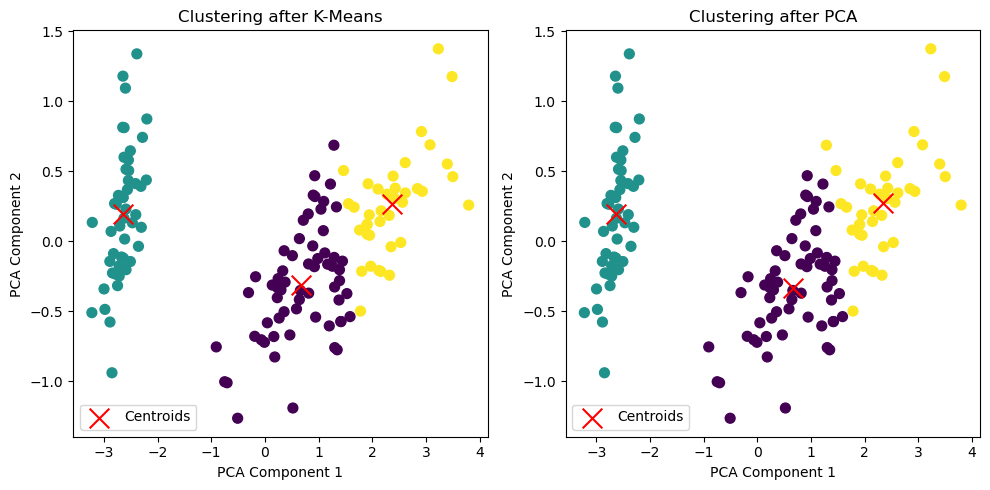

轮廓系数 (原始数据后聚类): 0.55
轮廓系数 (降维后聚类): 0.60


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

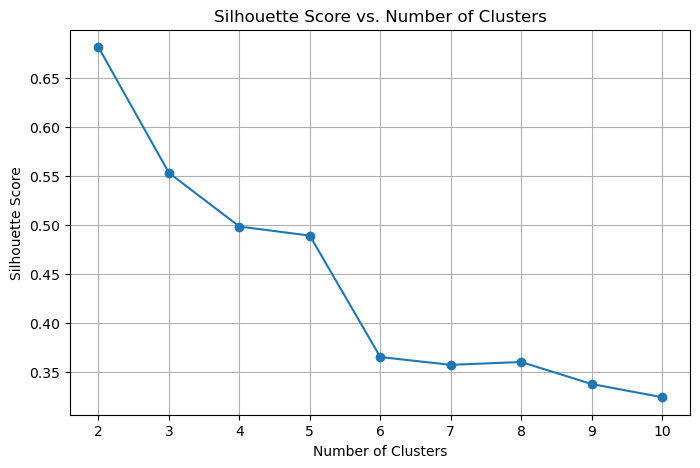

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#1.
iris = datasets.load_iris()
X = iris.data
y = iris.target

#2.
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

#3.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
centroids = pca.transform(kmeans.cluster_centers_)  # 将中心点也降维
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("Clustering after K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

#4.
pca_before_kmeans = PCA(n_components=2)
X_reduced = pca_before_kmeans.fit_transform(X)

kmeans_reduced = KMeans(n_clusters=3, random_state=0)
y_kmeans_reduced = kmeans_reduced.fit_predict(X_reduced)

plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans_reduced, cmap='viridis', s=50)
centroids_reduced = kmeans_reduced.cluster_centers_
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("Clustering after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()

#5.
silhouette_original = silhouette_score(X, y_kmeans)
silhouette_reduced = silhouette_score(X_reduced, y_kmeans_reduced)
print(f"轮廓系数 (原始数据后聚类): {silhouette_original:.2f}")
print(f"轮廓系数 (降维后聚类): {silhouette_reduced:.2f}")

#6.
silhouette_scores = []
cluster_range = range(2, 11)  # 尝试2到10个聚类数
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans))

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.grid()
plt.show()
